# Lesson 08 - Numpy Part 2

# Objective

- Dive Deeper into Numpy package

# Aggregations

- These are operations like sum, mean, max, etc...
- Provide a look at the array and get basic statistics


In [8]:
import numpy as np
np.random.seed(1)
a=np.random.randint(-100, 100, (4,5))
print(a)
print(f"Minimum: {a.min()}, maximum: {a.max()}")
print(f"Sum: {a.sum()}")
print(f"Mean: {a.mean()}, standard deviation: {a.std()}")

[[-63  40 -28  37  33]
 [-21  92  44  29 -29]
 [ 34 -75  78 -80   1]
 [ 46  39  56  57  42]]
Minimum: -80, maximum: 92
Sum: 332
Mean: 16.6, standard deviation: 48.41218854792665


# Column/Row Aggregations

- All depends on the `axis`

<img src="./img/aggregation.svg"/>

In [9]:
np.random.seed(9)
b=np.random.randint(0, 10, (3,4))
print(b)
print("Column sums:", b.sum(axis=0))
print("Row sums:", b.sum(axis=1))

[[5 6 8 6]
 [1 6 4 8]
 [1 8 5 1]]
Column sums: [ 7 20 17 15]
Row sums: [25 19 15]


# Boolean Operations

- Like integer or string comparison
- Compare using a single value or other arrays

In [24]:
import numpy as np
a = np.arange(3)
print(a)
b = np.linspace(start=-1, stop=2, num=3)
print(b)
c = a > b
c

[0 1 2]
[-1.   0.5  2. ]


array([ True,  True, False])

In [25]:
print(c.all())   # were all True
print(c.any())   # was some comparison True

False
True


# Boolean Operations

- True value map to value 1
- False value map to value 0

#### Count the number of True/False Values

In [28]:
print(f"Number of True values: {c.sum()}")
print(f"Number of False values: {c.size - c.sum()}")

Number of True values: 2
Number of False values: 1


## Real World Data

- Load in some weather data

In [34]:
import pandas as pd
temps = pd.read_csv(("https://www.cs.helsinki.fi/u/jttoivon/dap/"\
                     "data/fmi/kumpula-weather-2017.csv"))['Air temperature (degC)'].values
temps[:10]

array([  0.6,  -3.9,  -6.5, -12.8, -17.8, -17.8,  -3.8,  -0.5,   0.5,
         1.7])

In [43]:
print("Number of days with the temperature below zero:", np.sum(a < 0))
print("Number of days with the temperature is greater than zero and less than ten:", np.sum((a > 0) & (a < 10)))

Number of days with the temperature below zero: 49
Number of days with the temperature is greater than zero and less than ten: 185


# Sorting Data

- `np.sort()` sorts and creates a new dataset in memory
- `np.array.sort()` performs the action on the dataset itself

In [44]:
rando = np.random.randint(0,10, (4,4))
rando

array([[0, 8, 8, 8],
       [2, 6, 8, 1],
       [8, 3, 5, 3],
       [6, 7, 9, 0]])

In [46]:
np.sort(rando, axis=0) # Column Sort

array([[0, 3, 5, 0],
       [2, 6, 8, 1],
       [6, 7, 8, 3],
       [8, 8, 9, 8]])

In [48]:
np.sort(rando) # row sort

array([[0, 8, 8, 8],
       [1, 2, 6, 8],
       [3, 3, 5, 8],
       [0, 6, 7, 9]])

# `argsort` a Variant of Sort

- returns the Index of the sorted data instead of an array

In [50]:
sorted_idx = np.argsort(rando)
sorted_idx

array([[0, 1, 2, 3],
       [3, 0, 1, 2],
       [1, 3, 2, 0],
       [3, 0, 1, 2]], dtype=int64)

# Iris dataset

- The iris dataset contains the following data
    + 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
print(X[:4]) # First Four Rows

In [59]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Pearson Correlation Coefficient

- measures the linear relationship between two datasets.  
- the assumption is that each dataset is normally distributed

In [60]:
import scipy
scipy.stats.pearsonr(X[0], X[2])

(0.9999739110463368, 2.6088953663183645e-05)

In [68]:
np.corrcoef(X[0], X[2])

array([[1.        , 0.99997391],
       [0.99997391, 1.        ]])

# Image Processing with Numpy

- An image is a collection of pixels
- A grayscale image can be represented as as two dimensional array, whose first axis corresponds to the x coordinate of the image and the second axis corresponds to the y coordinate. The array contains at each coordinate pair (x,y) a value, which is typically a float between 0.0 and 1.0, or an integer between 0 and 255. This specifies the level of grayness. For example, if the array contains value 255 at coordinates (0,0), then in the image the pixel at top left is white.

- In color images there is third axis is for the red, green, and blue components of each pixel. For each of these color components there is a value between 0.1 and 1.0 (or between 0 and 255). The combinations of different values for the three components red, green, and blue can result in at least 16.7 million colors.

(368, 640, 3)
The image consists of 235520 pixels


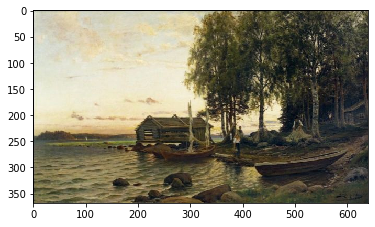

In [69]:
import matplotlib.pyplot as plt
painting=plt.imread("./img/painting.png")
print(painting.shape)
print(f"The image consists of {painting.shape[0] * painting.shape[1]} pixels")
plt.imshow(painting)

# Image Processing

- Flip the image like reversing a list

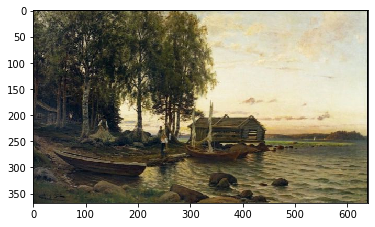

In [70]:
plt.imshow(painting[:,::-1])

# Image Processing

- remap pixels to white

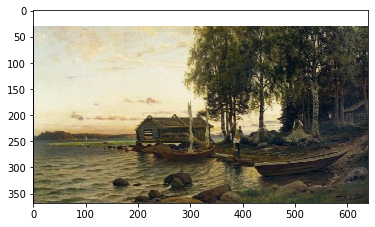

In [71]:
painting2 = painting.copy()    # don't mess the original painting!
painting2[0:30, :, :] = 1.0    
plt.imshow(painting2)

# Image Processing

- Since the image is just a collection of numeric values you can do all kinds of things

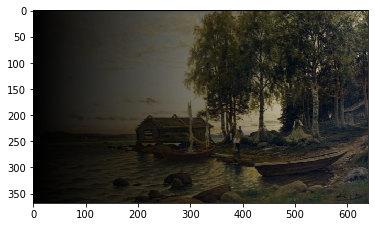

In [74]:
p3 = painting.copy()
height, width = p3.shape[:2]
m=np.linspace(0,1, width).reshape(1,width,1) # shae the image
result = p3*m      
plt.imshow(result)

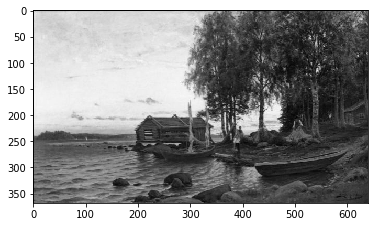

In [93]:
img_gray = np.average(p3, weights=[0.299, 0.587, 0.114], axis=2)
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))

# Image Processing Example - Finding Points

#### 1. Create some Random Image with Points

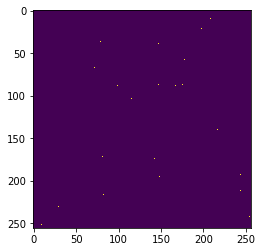

In [95]:
n=5
l=256
im = np.zeros((l,l))
np.random.seed(0)
points = np.random.randint(0, l, (2, n**2))  # sample n*n pixels from the array im
im[points[0], points[1]] = 1
plt.imshow(im)

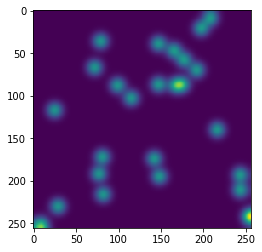

In [98]:
from scipy import ndimage
im2 = ndimage.gaussian_filter(im, sigma=l/(8.*n))  # blur the image a bit
plt.imshow(im2)

#### 2. Find the Clusters

Number of clusters is 12


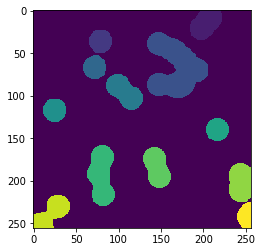

In [99]:
mask = im2 > im2.mean()     # mask those pixels whose intensity is above mean
label_im, nb_labels = ndimage.label(mask)   # connected components form clusters
print(f"Number of clusters is {nb_labels}")
plt.imshow(label_im)